## Boston House Price

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [4]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [5]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
data.columns = boston.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
data['Price'] =  boston.target
data.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


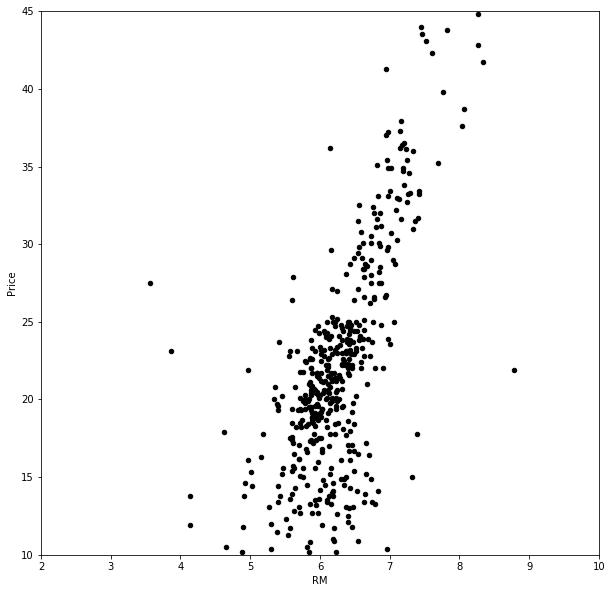

In [8]:
data.plot(kind='scatter', x ="RM", y="Price", figsize=(10, 10), color='black', xlim=(2,10), ylim=(10,45))

In [9]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['RM']), y=data['Price'])
prediction = linear_regression.predict(X=pd.DataFrame(data['RM']))
print('a value: ', linear_regression.intercept_)
print('b value: ',linear_regression.coef_)

a value:  -34.67062077643857
b value:  [9.10210898]


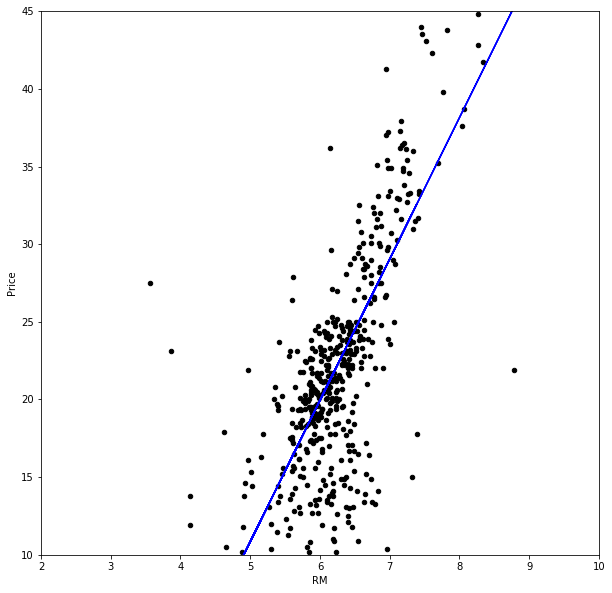

In [10]:
data.plot(kind='scatter', x='RM', y='Price', figsize=(10,10), color='black',
         xlim=(2,10), ylim=(10, 45))

plt.plot(data['RM'], prediction, color='b')

#### RM :  average number of rooms per dwelling

#### 결론 :  주거 당 평균 방 수(RM)가 증가할 수록 boston의 Price(단위 1000달러)가  증가함을 알 수 있습니다. 

## Diabetes(당뇨)

In [11]:
from sklearn.datasets import load_diabetes

In [12]:
dia = load_diabetes()
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [13]:
dia_Y=pd.DataFrame(dia.target, columns =['target'])
dia_Y[:5]

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [14]:
dia_X=pd.DataFrame(dia.data[:,0:3],columns = ['age','sex','bmi'])
dia_X[:5]

,age,sex,bmi
0,0.038076,0.050680,0.061696
1,-0.001882,-0.044642,-0.051474
2,0.085299,0.050680,0.044451
3,-0.089063,-0.044642,-0.011595
4,0.005383,-0.044642,-0.036385


In [15]:
dia_df=pd.concat([dia_Y,dia_X], axis=1)
dia_df[:5]

,target,age,sex,bmi
0,151.0,0.038076,0.050680,0.061696
1,75.0,-0.001882,-0.044642,-0.051474
2,141.0,0.085299,0.050680,0.044451
3,206.0,-0.089063,-0.044642,-0.011595
4,135.0,0.005383,-0.044642,-0.036385


In [16]:
dia_df['grp']=np.where(dia_df['sex'] > 0,'M','F')
dia_df.drop(columns=['sex'],inplace=True)
dia_df[:5]

,target,age,bmi,grp
0,151.0,0.038076,0.061696,M
1,75.0,-0.001882,-0.051474,F
2,141.0,0.085299,0.044451,M
3,206.0,-0.089063,-0.011595,F
4,135.0,0.005383,-0.036385,F


In [17]:
def lin_regress(data , yvar, xvars):
    Y=data[yvar]
    X=data[xvars]
    linreg=linear_model.LinearRegression()
    model = linreg.fit(X,Y)
    intercept =  model.intercept_
    coef = model.coef_
    result = [intercept, coef]
    return result

In [18]:
grouped = dia_df.groupby('grp')
lin_reg_coef = grouped.apply(lin_regress, 'target',['age','bmi'])

In [19]:
lin_reg_coef

grp
F    [152.40684676047456, [23.199210147823965, 814....
M    [148.21507864445124, [291.7563226838977, 1092....
dtype: object

In [20]:
lin_reg_coef['M']

[148.21507864445124, array([ 291.75632268, 1092.80118705])]

In [21]:
lin_reg_coef['F']

[152.40684676047456, array([ 23.19921015, 814.50932703])]

남성('M') 그룹의 당뇨병 진단 target = 148.2 + 291.8 x age + 1,092.8 x bmi
여성('F') 그룹의 당뇨병 진단 target = 152.4 + 23.2 x age + 814.5 x bmi 


다른 변수가 고정되었다고 했을 때 (표준화한) bmi 값이 한 단위 증가할 때 '남성('M')' 그룹의 당뇨병 진단 target 은 1,092.8 만큼 증가하는 반면에 '여성('F') 그룹의 당뇨병 진단 target은 814.5 만큼 증가하는 것으로 나왔습니다.

추가 설명

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [23]:
dia_X.drop(columns=['sex'],inplace=True)
dia_X

,age,bmi
0,0.038076,0.061696
1,-0.001882,-0.051474
2,0.085299,0.044451
3,-0.089063,-0.011595
4,0.005383,-0.036385
...,...,...
437,0.041708,0.019662
438,-0.005515,-0.015906
439,0.041708,-0.015906
440,-0.045472,0.039062


In [24]:
dia_Y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [45]:
reg = LinearRegression()
reg.fit(dia_X,dia_Y)
reg.score(dia_X,dia_Y)

0.3504428396718997

In [46]:
X_age = dia_X['age']
X_bmi = dia_X['bmi']

In [55]:
X_age =np.array(X_age).reshape(-1,1)
reg.fit(X_age,dia_Y)
predict_reg_age = reg.predict(X_age)

Text(0, 0.5, 'progression')

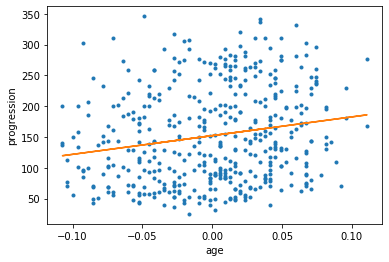

In [60]:
plt.plot(X_age,dia_Y,'.')
plt.plot(X_age,predict_reg_age,linestyle='-') 
plt.xlabel('age')
plt.ylabel('progression')

In [57]:
X_bmi =np.array(X_bmi).reshape(-1,1)
reg.fit(X_bmi,dia_Y)
predict_reg_bmi = reg.predict(X_bmi)

Text(0, 0.5, 'progression')

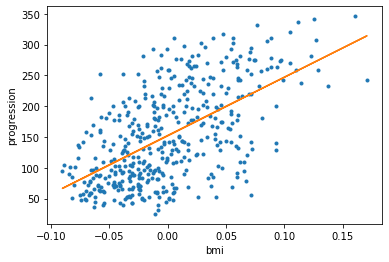

In [63]:
plt.plot(X_bmi,dia_Y,'.')
plt.plot(X_bmi,predict_reg_bmi,linestyle='-') 
plt.xlabel('bmi')
plt.ylabel('progression')

regression을 한 결과 전체 분포에서 age,bmi의 표준화된 값이 증가 할 수록 증가 함을 알수있고 기울기를 보았을 때 bmi의 값이 age보다 더 큰 영향을 줌을 가시적으로 확인 할 수 있습니다. reg.score 값 0.35